In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import matplotlib

def create_color_map( error_mean, vmin=0, vmax=100, **args):
    color_map = sns.cubehelix_palette( reverse=True, as_cmap=True, **args)
    colors = matplotlib.colors.Normalize( vmin=vmin, vmax=vmax )
    l_colors = [255*np.array(color_map(colors(100*err))) for err in error_mean ]
    return 255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

In [4]:
data = np.load('data_final_tomography.npy', allow_pickle=True)[0]

In [5]:
quantities_mean = data['single']['quantities_mean']
quantities_std= data['single']['quantities_std']
quantities_2_mean = data['double']['quantities_mean']
quantities_2_std= data['double']['quantities_std']

In [6]:
color = ['tab:green','tab:orange','tab:blue']
order_pairs = [ 3, 4, 0, 2, 1, 5 ]

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size"  : 18,
    "font.sans-serif": ["Helvetica"]})

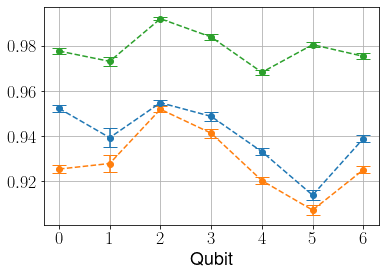

In [8]:
for k in range(3):
    plt.errorbar( x=range(7), y=quantities_mean[:,k], yerr=quantities_std[:,k], capsize=7, fmt='--o',color=color[k] )
plt.xlabel('Qubit')
#plt.errorbar( x=range(7), y=np.mean( quantities_mean, 1 ), yerr=np.mean( quantities_std, 1 ), capsize=7, fmt=':s', color='tab:red' )
plt.xticks([0,1,2,3,4,5,6])
#plt.legend( [r'$F$',r'$Q$', r'$1-D$'], loc='lower left' )
plt.grid()
plt.savefig('quantities_single.svg', bbox_inches='tight' )

<ErrorbarContainer object of 3 artists>

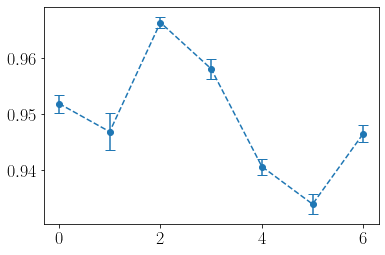

In [9]:
plt.errorbar( x=range(7), y=np.mean( quantities_mean, 1 ), yerr=np.mean( quantities_std, 1 ), capsize=5, fmt='--o' )

In [10]:
np.mean( quantities_mean, 1 )

array([0.95184317, 0.94681211, 0.96630822, 0.95803963, 0.94059441,
       0.9338914 , 0.94649442])

In [11]:
create_color_map(np.mean( quantities_mean, 1 ), 93, 97, start=2.8, rot=.1 )

(array([ 28.80987579,  38.16447768,  62.18182783, 255.        ]),
 array([217.75517571, 211.88998467, 242.34884824, 255.        ]),
 [array([128.45337789, 130.53191916, 185.91071018, 255.        ]),
  array([103.01472544, 108.9099469 , 162.17031288, 255.        ]),
  array([200.79340329, 194.86060898, 234.49309869, 255.        ]),
  array([159.9044047 , 157.47237041, 210.18186491, 255.        ]),
  array([ 73.30351856,  82.79196451, 128.74273462, 255.        ]),
  array([ 43.93762118,  54.53108201,  87.68531198, 255.        ]),
  array([101.9254397 , 107.97570095, 161.06113714, 255.        ])])

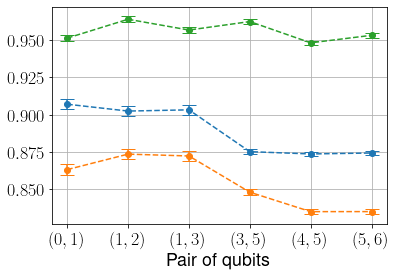

In [12]:
for k in range(3):
    plt.errorbar( x=range(6), y=quantities_2_mean[order_pairs,k], yerr=quantities_2_std[order_pairs,k], capsize=7, fmt='--o', color=color[k] )
plt.xlabel( 'Pair of qubits')
#plt.errorbar( x=range(6), y=np.mean( quantities_2_mean[order_pairs,:], 1 ), yerr=np.mean( quantities_2_std[order_pairs,:], 1 ), capsize=7, fmt=':s', color='tab:red' )
#plt.legend( [r'$F$',r'$Q$', r'$1-D$'], loc='lower left'  )
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$','$(1,2)$','$(1,3)$','$(3,5)$','$(4,5)$','$(5,6)$'] )
plt.grid()
plt.savefig('quantities_double.svg', bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

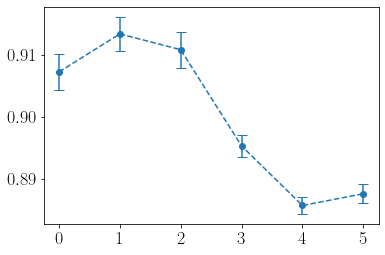

In [13]:
plt.errorbar( x=range(6), y=np.mean( quantities_2_mean[order_pairs,:], 1 ), yerr=np.mean( quantities_2_std[order_pairs,:], 1 ), capsize=5, fmt='--o' )

In [14]:
create_color_map( np.mean( quantities_2_mean[order_pairs,:], 1 ), 88, 92, rot = -.4 )

(array([ 27.77491317,  38.77109381,  61.7507723 , 255.        ]),
 array([198.59433255, 228.9180809 , 203.27276485, 255.        ]),
 [array([117.51580338, 181.65608184, 159.71022946, 255.        ]),
  array([154.98532324, 206.81042325, 177.14737459, 255.        ]),
  array([138.16696002, 196.54573363, 168.98076685, 255.        ]),
  array([ 65.9552124 , 121.78572439, 130.54392608, 255.        ]),
  array([ 41.02671168,  68.49625371,  93.44720737, 255.        ]),
  array([ 45.66234793,  79.62471452, 102.93368831, 255.        ])])

In [15]:
cross_fidelity_mean = data['crosstalk']['cross_fidelity_mean']
cross_fidelity_std  = data['crosstalk']['cross_fidelity_std']
cross_qndness_mean  = data['crosstalk']['cross_qndness_mean']
cross_qndness_std   = data['crosstalk']['cross_qndness_std']

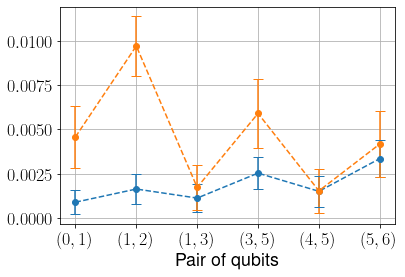

In [16]:
plt.errorbar( x=range(6), y=cross_fidelity_mean[order_pairs], yerr=cross_fidelity_std[order_pairs], capsize=5, fmt='--o' )
plt.errorbar( x=range(6), y=cross_qndness_mean[order_pairs], yerr=cross_qndness_std[order_pairs], capsize=5, fmt='--o' )
#plt.legend( [r'$C[F]$', r'$C[Q]$'] )
plt.grid()
plt.xlabel( 'Pair of qubits')
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$','$(1,2)$','$(1,3)$','$(3,5)$','$(4,5)$','$(5,6)$'] )
plt.savefig('cross_fidelity.svg', bbox_inches='tight' )

In [17]:
cross_povm_mean = data['crosstalk']['cross_pvm_mean']
cross_povm_std = data['crosstalk']['cross_pvm_std']
cross_choi_mean = data['crosstalk']['cross_choi_mean']
cross_choi_std = data['crosstalk']['cross_choi_std']

In [18]:
np.sqrt(2*4*4*4)*cross_povm_mean, np.sqrt(4)*cross_fidelity_mean

(array([0.01778838, 0.01735332, 0.02129123, 0.02224522, 0.01560484,
        0.01847517]),
 array([0.00223919, 0.00300238, 0.00505502, 0.00177471, 0.00326052,
        0.00669485]))

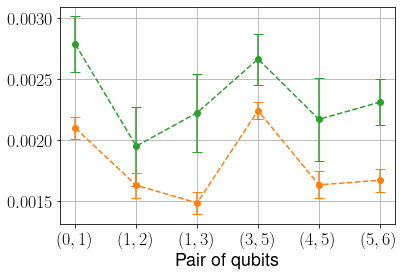

In [24]:
plt.errorbar( x=range(6), y=np.sqrt(2)*cross_povm_mean[order_pairs], yerr=cross_povm_std[order_pairs], capsize=5, fmt='--o', color=color[0] )
plt.errorbar( x=range(6), y=np.sqrt(2)*cross_choi_mean[order_pairs], yerr=cross_choi_std[order_pairs], capsize=5, fmt='--o', color=color[1] )
#plt.legend( [r'$C[\Pi]$', r'$C[\Upsilon]$'] )
plt.grid()
plt.xlabel( 'Pair of qubits')
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$','$(1,2)$','$(1,3)$','$(3,5)$','$(4,5)$','$(5,6)$'] )
plt.savefig('cross_error.svg', bbox_inches='tight' )